In [125]:
from sympy import init_printing
# Turn on SymPy stylised printing 
init_printing()
# Prepare figure plotting
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 5, 5

# **Algebraic Fractions AKA Rational Functions**

An algebraic fraction (or rational function) is a fancy name for the quotient (division, fraction) formed by two polynomials.

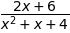

In [134]:
from sympy import Poly, symbols
x = symbols('x')
numerator = Poly('2*x+6', x)
denominator = Poly('x**2+x+4', x)
alg_frac = numerator/denominator
alg_frac

If the numerator is of lower degree than the denominator, then the algebraic fraction is said to be 'proper'. The algebraic fraction above is proper, as the numerator is degree 1 (linear), and the denominator, degree 2 (quadratic). Otherwise we have an 'improper' fraction.

In [135]:
# An improper fraction, degree 2 over degree 1
numerator = Poly('x**2+4', x)
denominator = Poly('-4*x')
alg_frac = numerator / denominator
alg_frac


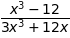

In [136]:
# Another improper fraction, degree 3 over degree 3
numerator = Poly('x**3-12', x)
denominator = Poly('3*x**3+12*x')
alg_frac = numerator / denominator
alg_frac

**Manipulation of Algebraic Fractions**

Improper algebraic fractions can be 'divided out'. This 'polynomial long division' is generally dreaded by Higher / A-level students, but SymPy makes it painless!

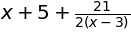

In [141]:
from sympy import apart
numerator = Poly('2*x**2+4*x-9', x)
denominator = Poly('2*x-6')
alg_frac = numerator/denominator
divided_form = apart(alg_frac)
divided_form

// Show how painful polynomial long division is on board

Or we can use together() to accomplish the opposite process, bringing terms together into a single fraction

In [144]:
divided_form = x-1 + 6/(x-2)
divided_form

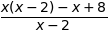

In [173]:
from sympy import together
single_fraction = together(divided_form)
single_fraction

We can also use the denom() and numer() functions to access the denominator and numerator, respectively, of the algebraic fraction

In [174]:
from sympy import denom, numer
denom(single_fraction)

In [175]:
numer(single_fraction)

In [177]:
# This allows for manipulation of the numerator and denominator separately, e.g.
from sympy import expand
expand(numer(single_fraction))

**Partial Fractions**

As an example of how we can manipulate algebraic fractions, here is a classic problem from A-level / Advanced Higher. Write the rational function (3x + 5) / (2x^2 - 5x + 3) as a sum of partial fractions of the form A / (x-3) + B / (2x+1) <br><br>
You may well wonder "Great, but why?!". Partial fraction decompositions can be useful in calculus, in particular for integration, as we'll perhaps see later on.

In [206]:
from sympy import Eq, solve
x, A, B = symbols('x,A,B')
lhs = (3*x+5) / (2*x**2-5*x-3)
rhs = (A / (x-3)) + (B / (2*x+1))
eq = Eq(lhs, rhs)
soln = solve(eq, [A,B])
soln

In [207]:
# Check: lhs - rhs should be zero with correct values of A and B substituted in to the rhs
# See the section below on Equality in SymPy
simplify(lhs - rhs.subs(soln)) 

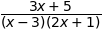

In [208]:
# Or, alternatively
rhs_as_single_frac = together(rhs.subs(soln))
rhs_as_single_frac

In [209]:
expand(numer(rhs_as_single_frac))

In [211]:
expand(denom(rhs_as_single_frac))

# **Equality in SymPy**

Checking the equality of expressions in SymPy is slightly tricky. This is due to the tree structure used to represent expressions.

In [212]:
x = symbols('x')
expr1 = (x-2)*(x+4)
expr2 = x**2 + 2*x - 8

In [226]:
# expr1 is a multiplication of two terms
type(expr1)

sympy.core.mul.Mul

In [228]:
# the terms are held in the .args instance variable
expr1.args

In [232]:
# each of the terms itself has a type
type(expr1.args[0]), type(expr1.args[1])

(sympy.core.add.Add, sympy.core.add.Add)

In [233]:
# So first term is an Add(), and second also an Add()
# here are the terms of the terms
expr1.args[0].args, expr1.args[1].args

In [216]:
# The tree representing expr2 differs even at the root node
type(expr2)

sympy.core.add.Add

In [218]:
# We know these expressions should be equal, but straightforward equality comparison doesn't work
# This is because the two trees differ.
expr1 == expr2

False

In [221]:
# Instead, it's easiest to do something like this
simplify(expr1 - expr2)

In [234]:
# Or, you can work on one expression to make it more like the other
# But it isn't always obvious how to do this, and the lhs - rhs subtraction method above is generally easiest
from sympy import expand
expand(expr1)

In [235]:
expand(expr1) == expr2

True

In [239]:
# Alternatively, factorise expr2
expr2.factor()

In [241]:
expr1 == expr2.factor()

True

# **Sympify - Converting Text to Maths**

SymPy offers the sympify() function, which converts a string into a symbolic object. Not to be confused with simplify(), which simplifies an expression as far as possible

In [22]:
from sympy import symbols, sympify, S
x, y = symbols('x,y')
expression = sympify('2*x+3*y+9')
expression

In [17]:
# Can also use the convenient S() function
S('12*x - 9*y**2')

In [23]:
# And we can even use this instead of Symbol() and symbols() 
a,b = S('a,b')
a,b

This offers up neat possibilities for user interactivity with SymPy

In [242]:
from sympy import SympifyError, pprint
def plot_expression():
    y = S('y')
    expr = input('Enter an expression to plot: ')
    try:
        expr = sympify(expr)
    except SympifyError:
        print('Invalid input')
        return
    solutions = solve(expr, y)
    print("Expression has " + str(len(solutions)) + " solutions in terms of y:")
    for solution in solutions:
        if solutions[0] == solution:
            composite_plot = plot(solution, show = False)
        else:
            composite_plot.extend(plot(solution, show = False))
    composite_plot.show()
    return solutions

Enter an expression to plot: 12*x**3 - 9*y**2
Expression has 2 solutions in terms of y:


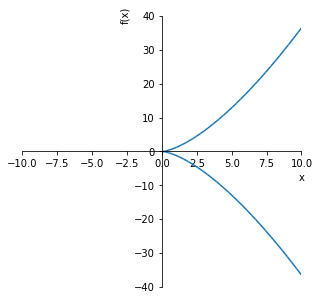

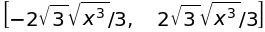

In [243]:
plot_expression()

# **Intervals - A Prelude to Inequalities**

An *interval* is the mathematical name for a range of numbers. Intervals come in a number of varieties, which we'll now examine. 

// Board - show number lines, closed and open dot notation

**Open Intervals**

An open interval contains all the numbers of the appropriate type between two bounds, but, importantly, *does not* contain the numbers exactly at the boundaries. <br>
Think of this like the *open/closed* SOLID principle: the open interval is open for extension, i.e. the bounding values are not included.

In [120]:
from sympy import Interval, oo, Rational
interval = Interval.open(Rational(4,3),oo)
interval

In [25]:
interval.contains(1)

In [26]:
interval.contains(4)

In [27]:
interval.contains(Rational(4/3))

In [28]:
interval.contains(oo)

**Closed Intervals**

The closed interval is the opposite, the bounding numbers *are* included. <br>
In open/closed terms, it's closed for extension...

In [118]:
interval = Interval(5,7)
interval

In [30]:
interval.contains(1)

In [31]:
interval.contains(8)

In [32]:
interval.contains(5)

In [33]:
interval.contains(7)

**Left-Open Intervals**

The left-open interval is *open* on the left-hand boundary, and *closed* on the right-hand boundary. 

In [119]:
interval = Interval.Lopen(1, 5)
interval

In [35]:
interval.contains(1)

In [36]:
interval.contains(5)

**Right-Open Intervals**

Finally, the right-open interval is *closed* on the left-hand boundary, and *open* on the right-hand boundary.

In [122]:
interval = Interval.Ropen(-5, -2)
interval

In [123]:
interval.contains(-5)

In [124]:
interval.contains(-2)

**A Subtlety - Infinity and Closed Intervals**

Note that +/- infinity is *never* included in closed intervals of any flavour

In [40]:
interval = Interval(-oo, oo)

In [41]:
interval.contains(-oo)

In [42]:
interval.contains(oo)

In [43]:
interval = Interval.Lopen(-1, oo)

In [44]:
interval.contains(-1)

In [45]:
interval.contains(oo)

# **Single Variable Inequalities**

**Linear Inequality**

In [46]:
# Let's solve a linear inequality first
from sympy import Poly, solve_poly_inequality
x = symbols('x')
inequality_object = -3*x +2 < 0
lhs = inequality_object.lhs
# Represent our linear lhs as a polynomial
# solve_poly_inequality expects a Polynomial object as an argument
p = Poly(lhs,x)
# The relational operator is one of <, >, <=, >=
relational_operator = inequality_object.rel_op
solution_intervals = solve_poly_inequality(p, relational_operator)
solution_intervals[0]

In [47]:
# What happens if we change the relational operator
inequality_object = -3*x +2 <= 0
lhs = inequality_object.lhs
p = Poly(lhs,x)
relational_operator = inequality_object.rel_op
solution_intervals = solve_poly_inequality(p, relational_operator)
solution_intervals[0]

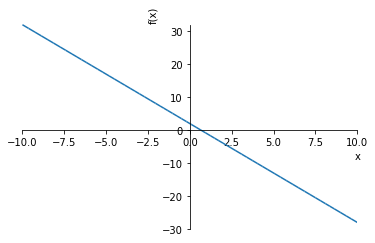

In [48]:
# Think about how the solution interval relates to the roots of the line
from sympy import plot
plot(lhs)

In [49]:
from sympy import solve
solve(lhs, x)

**Quadratic Inequality**

In [50]:
inequality_object = x**2 - 2*x -1 <= 0
lhs = inequality_object.lhs
p = Poly(lhs,x)
relational_operator = inequality_object.rel_op
solution_intervals = solve_poly_inequality(p, relational_operator)
solution_intervals

In [51]:
# So, a single relational operator
# Again, think about how this relates to the roots of the quadratic
solve(lhs, x)

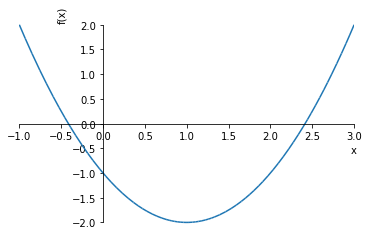

In [52]:
plot(lhs, (x, -1, 3))

In [53]:
# In particular, what happens to the solution intervals if we 'reverse' the relational operator
inequality_object = x**2 - 2*x -1 > 0
lhs = inequality_object.lhs
p = Poly(lhs,x)
relational_operator = inequality_object.rel_op
solution_intervals = solve_poly_inequality(p, relational_operator)
solution_intervals

In [54]:
# Now we have two solution intervals. Why? Look at the plot above of the quadratic.

**Cubic Inequality**

Have a go at interpreting the solution intervals produced for the following inequality, thinking again about the relationship between the inequality and the roots of the polynomial

In [55]:
inequality_object = 4*x**3 + 4*x**2 - 12*x - 3 >= 0

Solution

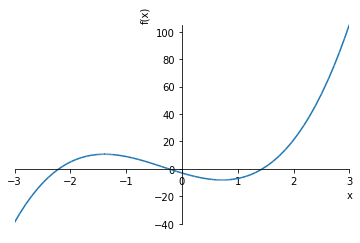

In [56]:
lhs = inequality_object.lhs
plot(lhs, (x, -3, 3))

In [57]:
from sympy import N
p = Poly(lhs,x)
relational_operator = inequality_object.rel_op
solution_intervals = solve_poly_inequality(p, relational_operator)
solution_intervals

In [58]:
for solution_interval in solution_intervals:
    print(N(solution_interval))

Interval(-2.20587173105279, -0.235833050882057)
Interval(1.44170478193485, Infinity)
